In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Load Dataset 

In [2]:
df=pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# Heatmap Of Nan values

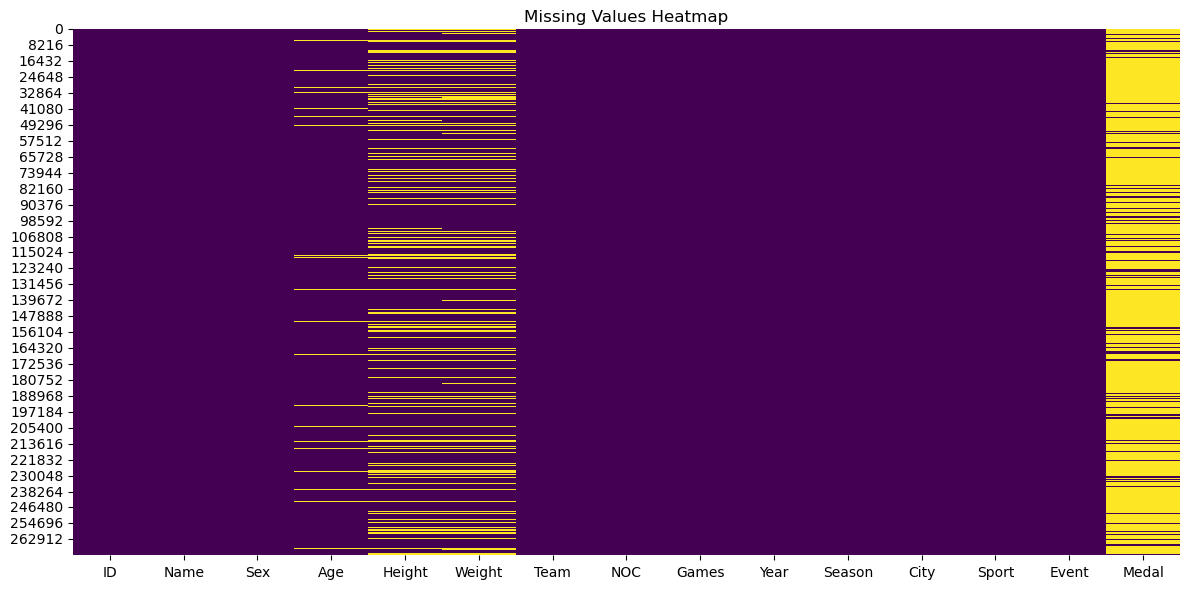

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(),cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()

# Fill Missing values

In [7]:
df.fillna({'Age':df['Age'].mean(),'Height':df['Height'].mean(),'Weight':df['Weight'].mean(),'Medal':df['Medal'].bfill()},inplace=True)

In [8]:
df.fillna({'Medal':df['Medal'].ffill()},inplace=True)

In [9]:
df.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

# 📈 Line Plot: Year-wise Olympic Events Count
- `This visualization shows how the number of Olympic events has changed over time.`

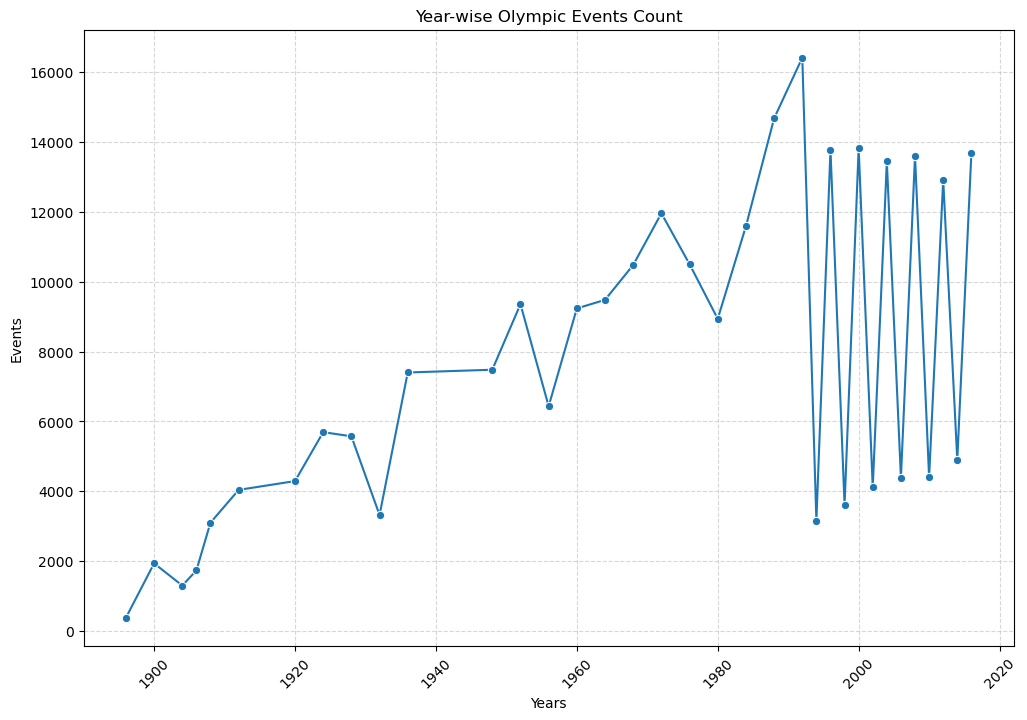

In [76]:
group_data=df.groupby('Year')['Event'].size().reset_index(name='Event')



plt.figure(figsize=(12,8))
sns.lineplot( x='Year', y='Event',data=group_data, marker='o',zorder=3)

plt.title('Year-wise Olympic Events Count')
plt.xlabel('Years')
plt.ylabel('Events')

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("Year-wise Olympic Events Count.png", dpi=300, bbox_inches='tight')
plt.show()

- 📊 **Insights**:
- Shows how the Olympic Games have expanded over time.

- Steady growth in events reflects:

- Introduction of new sports

- Inclusion of women's competitions

- Increased global participation

- Years with dips may indicate disruptions (like World Wars or cancellations).

# 🥇 Horizontal Bar Chart: Top 10 Countries with Most Medals
- `This visualization displays the top 10 countries that have won the highest number of Olympic medals.`

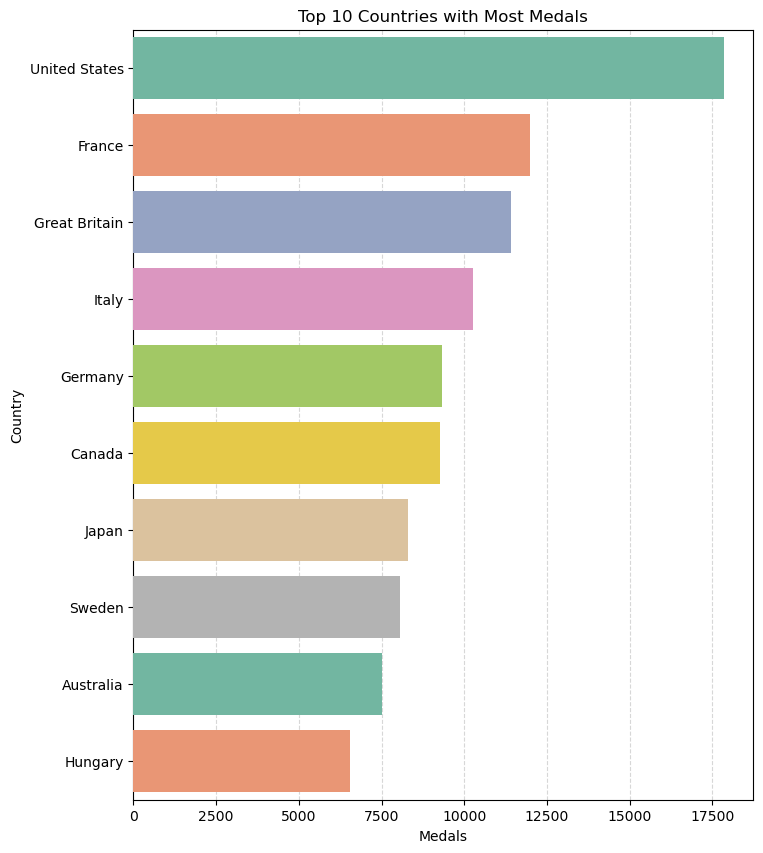

In [77]:
top10_countries=df.groupby('Team')['Medal'].size().nlargest(10).reset_index(name='Medals')


plt.figure(figsize=(8,10))
sns.barplot(x='Medals', y='Team', data=top10_countries, hue='Team',
            palette='Set2',zorder=3)

plt.title('Top 10 Countries with Most Medals')
plt.xlabel('Medals')
plt.ylabel('Country')

plt.grid(True, axis='x', linestyle='--',alpha=0.5)
plt.savefig("Top 10 Countries with Most Medals.png", dpi=300, bbox_inches='tight')
plt.show()

- **📊 Insights:**
- Shows which countries have dominated the Olympics in terms of total medals.

- Typically includes powerhouses like USA, Russia, China, Germany, etc.

- Highlights historical athletic performance by nation.



# 📈 Line Plot: Gender-wise Athlete Participation Over Time
- `This visualization shows how the number of male and female athletes has changed year by year in the Olympics.`

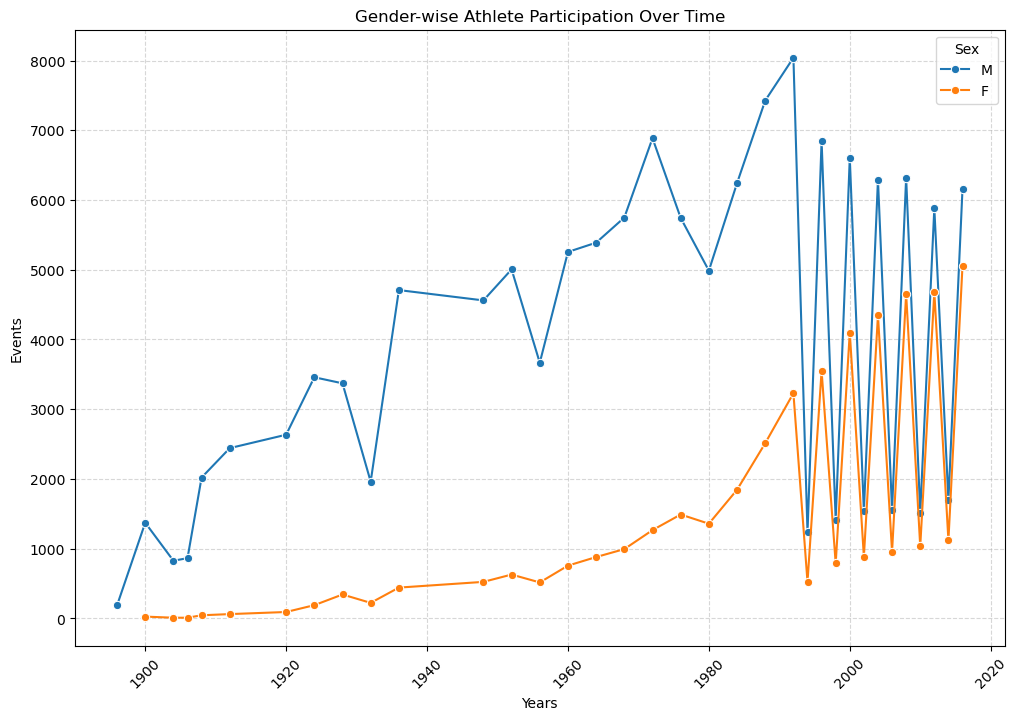

In [78]:
unique_df=df.drop_duplicates(['Year','Name','Sex',"Team"])
group_data=unique_df.groupby(['Year',"Sex"])["Name"].size().reset_index(name='Athelet_count')
group_data.fillna({'F':0,'M':0},inplace=True)



plt.figure(figsize=(12,8))
sns.lineplot( x='Year', y='Athelet_count',data=group_data, hue='Sex',zorder=3,marker='o')

plt.title('Gender-wise Athlete Participation Over Time')
plt.xlabel('Years')
plt.ylabel('Events')

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("Gender-wise Athlete Participation Over Time.png", dpi=300, bbox_inches='tight')
plt.show()

- **📊 Insights:**
- Early Olympic years had very few or no female participants.

- Female participation has steadily increased, especially from the late 20th century onwards.

- The gap between male and female athletes is narrowing in recent years.

- Reflects changing gender policies and inclusivity efforts in international sports.



# 🏅 Barplot: Top 10 Most Popular Sports by Number of Athletes
- `This visualization shows the 10 most popular sports in the Olympics based on the number of unique athletes who participated in each sport.`

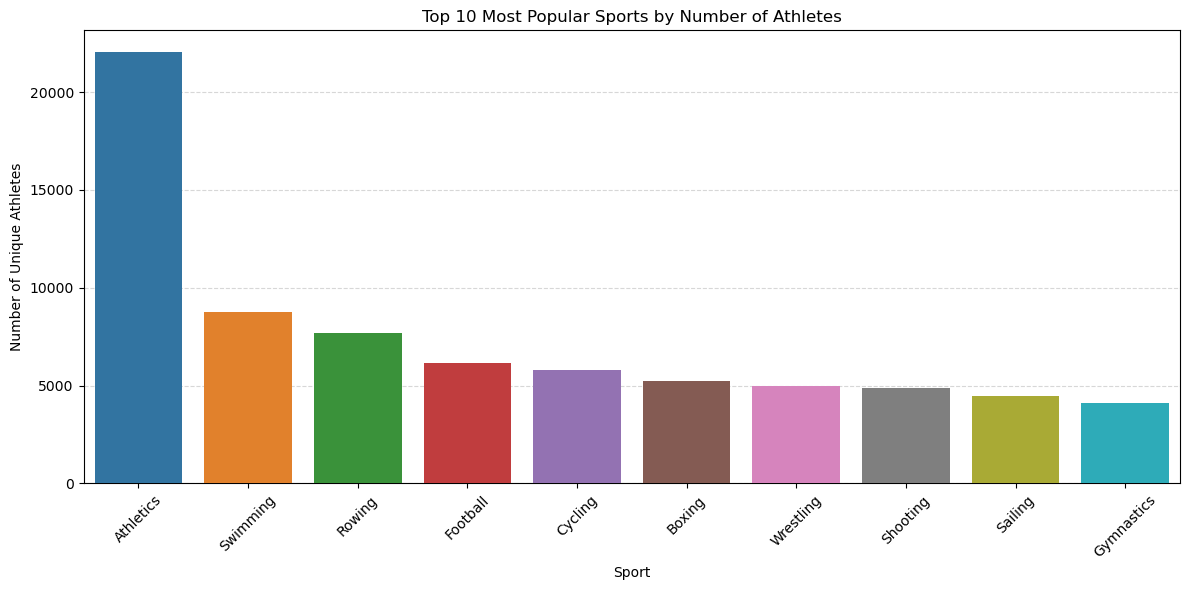

In [79]:
most_pop_game=df.drop_duplicates(subset=['Sport','Name'])
sport_athelet=most_pop_game.value_counts('Sport').nlargest(10).reset_index(name='athlete_count')



plt.figure(figsize=(12,6))
sns.barplot(x='Sport',y='athlete_count',data=sport_athelet,hue='Sport',zorder=3)
plt.xticks(rotation=45)

plt.title('Top 10 Most Popular Sports by Number of Athletes')
plt.xlabel('Sport')
plt.ylabel('Number of Unique Athletes')
plt.grid(True, linestyle='--',alpha=0.5,axis='y')
plt.tight_layout()
plt.savefig("Top 10 Most Popular Sports by Number of Athletes.png", dpi=300, bbox_inches='tight')
plt.show()

- **📊 Insights:**
- The most popular sports (by athlete count) are usually the ones with:

- More event categories (e.g., Athletics, Swimming)

- Both male and female participants

- Representation across multiple years

- Athletics and Swimming typically dominate due to their wide range of sub-events and global participation.

- The rotation of x-axis labels improves readability for sports with longer names.



# 🥇 Histogram: Age Distribution of Gold Medalists
- `This histogram visualizes the distribution of ages among athletes who have won Gold medals in the Olympic`

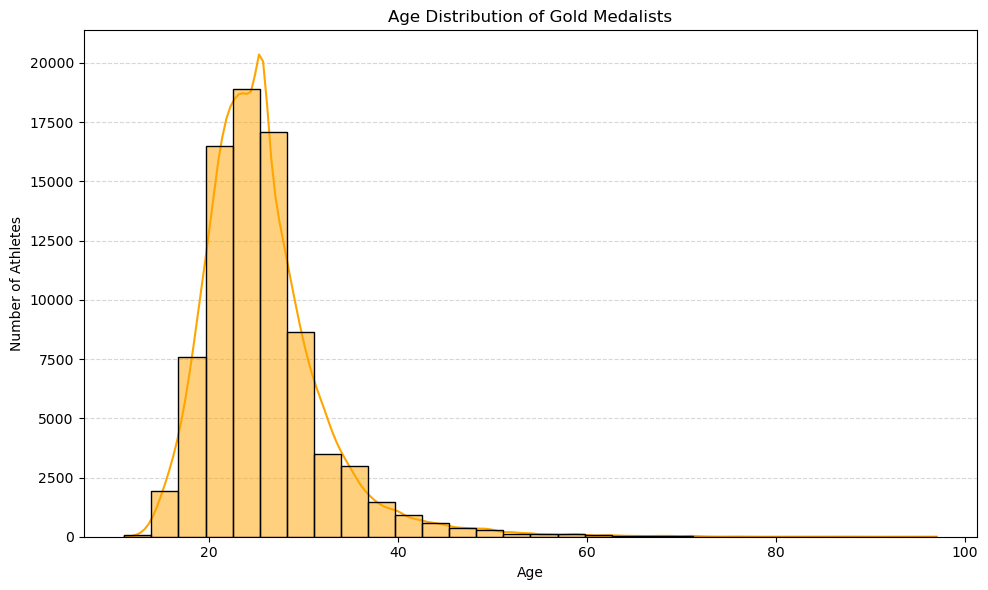

In [80]:

Golds=df[(df['Medal']=='Gold')]

plt.figure(figsize=(10,6))
sns.histplot(Golds['Age'],bins=30,kde=True,color='orange',zorder=5)


plt.title('Age Distribution of Gold Medalists')
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.grid(axis='y',alpha=0.5,linestyle='--',zorder=0)
plt.tight_layout()
plt.savefig("Age Distribution of Gold Medalists.png", dpi=300, bbox_inches='tight')
plt.show()

- **Insights:**
- The majority of Gold medalists fall between the ages of 20 and 30, with a sharp peak around 23–27 years.

- Younger athletes (ages 15–25) appear to dominate the Gold medal count.

- Very few Gold medals are won by athletes older than 35, although some exceptions exist.

- The KDE curve provides a smooth visual summary of the data’s distribution.



# ⚖️ Scatterplot: Height vs Weight of Athletes (by Gender)
- `This scatterplot visualizes the relationship between athletes' Height and Weight, with colors distinguishing their Gender (Sex).`

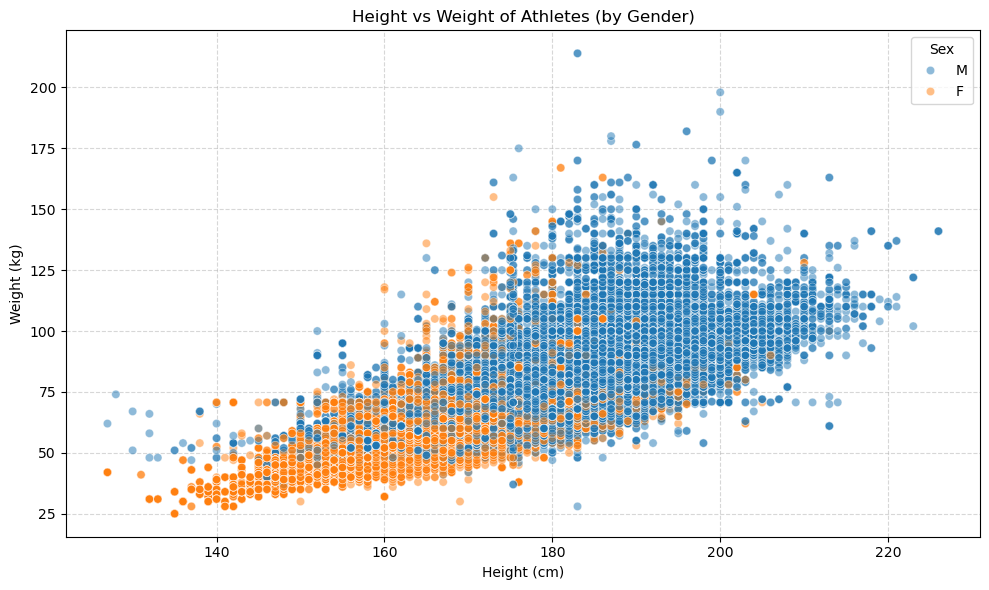

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Height',y='Weight',data=df, hue='Sex',alpha=0.5, zorder=3)

plt.title('Height vs Weight of Athletes (by Gender)')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

plt.grid(True,alpha=0.5,linestyle='--')
plt.tight_layout()
plt.savefig("Height vs Weight of Athletes (by Gender).png", dpi=300, bbox_inches='tight')
plt.show()

- **📈 Insights:**
- 👨 Male athletes (usually marked in one color) tend to show higher height and weight clusters overall.

- 👩 Female athletes (in another color) generally appear in the lower-left part of the chart, reflecting comparatively smaller height and weight.

- 🔄 There's a positive correlation between height and weight — taller athletes also tend to weigh more, regardless of gender.

# 🏅 Barplot: Top 15 Sports by Total Medal Winners

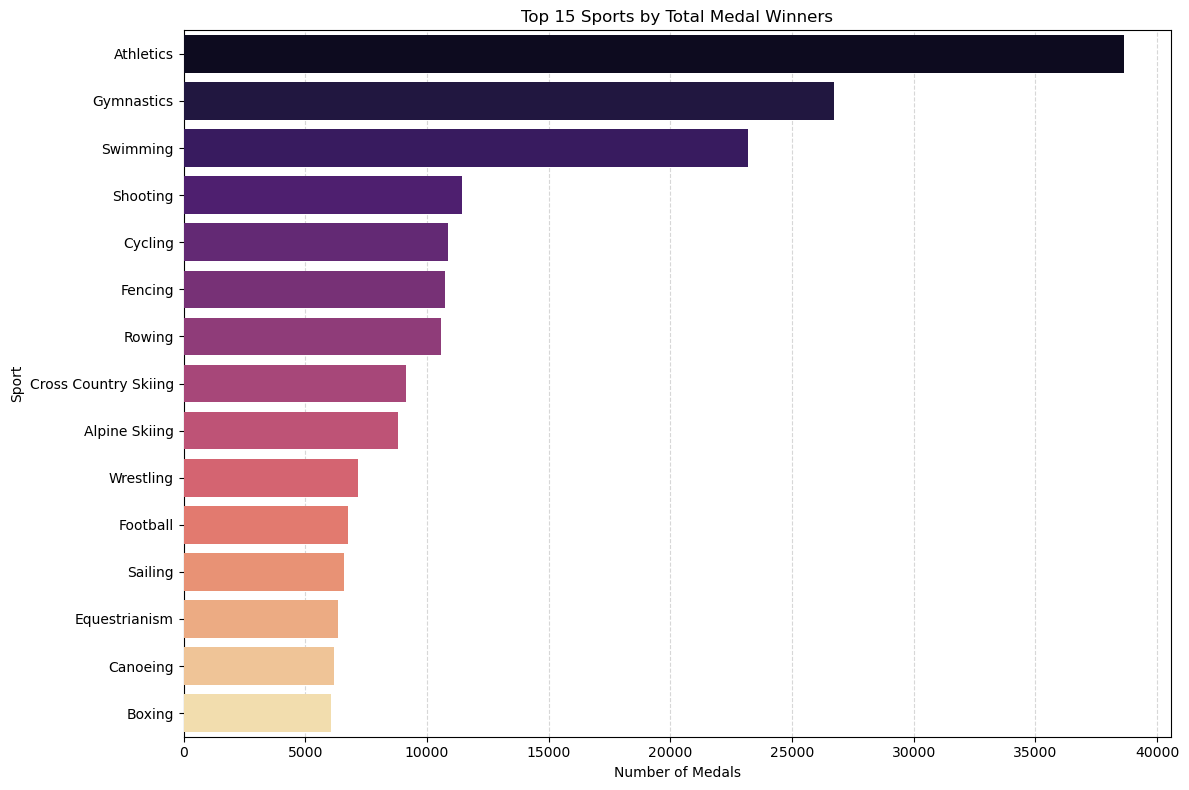

In [74]:
sports=df.groupby('Sport')['Medal'].size().nlargest(15).reset_index(name='Medal')
plt.figure(figsize=(12,8))
sns.barplot(data=sports, y='Sport', x='Medal',hue='Sport',zorder=3,   palette='magma')

plt.title('Top 15 Sports by Total Medal Winners')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')

plt.grid(linestyle='--', alpha=0.5, axis='x')
plt.tight_layout()
plt.savefig("Top 15 Sports by Total Medal Winners.png", dpi=300, bbox_inches='tight')
plt.show()

- This barplot showcases the 15 most successful sports in the Olympics based on the total number of medals won across all years and countries.

- **📈 Insights:**
- 🥇 Some sports like Athletics, Swimming, and Gymnastics dominate the medal count due to the high number of events in those categories.

- 🥋 Sports with broader international participation and more event categories naturally lead to higher medal tallies.

- 📊 This visualization helps in identifying which sports have historically been most competitive and rewarding in terms of medals.



# 🏅 Boxplot: Age Distribution by Medal Type

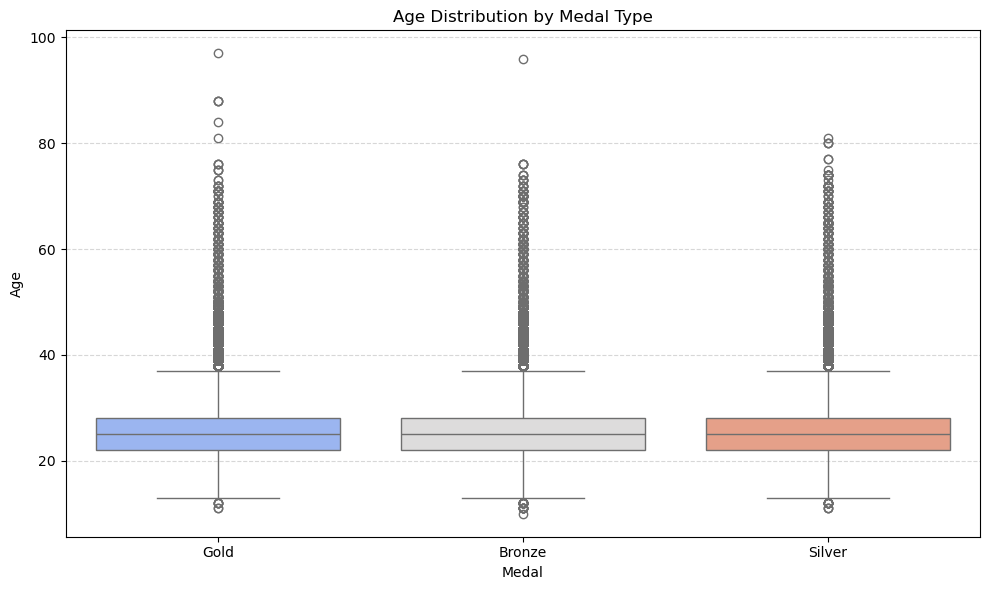

In [81]:


plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Medal',y='Age',hue='Medal', palette='coolwarm' )

plt.title('Age Distribution by Medal Type')
plt.xlabel('Medal')
plt.ylabel('Age')
plt.grid(True, alpha=0.5, linestyle='--',axis='y')
plt.tight_layout()
plt.savefig(" Boxplot Age Distribution by Medal Type.png", dpi=300, bbox_inches='tight')
plt.show()

### 🏅 Boxplot: Age Distribution by Medal Type
- This boxplot illustrates how the age of athletes varies based on the type of medal they won (Gold, Silver, Bronze).

- **Key Details**:
- ✅ The plot uses Seaborn's boxplot() to show the statistical distribution of ages for each medal category.

- ✅ The data is grouped by Medal on the x-axis and shows Age on the y-axis.

- ✅ hue='Medal' is applied to differentiate medal types with color-coded boxes using the palette='coolwarm'.

- ✅ The figure size is set to (10,6) for better visibility, and a horizontal dashed grid helps in reading age values clearly.


- 📈 **Insights:**
- 🟡 Gold Medalists tend to have a slightly younger median age compared to Bronze and Silver winners.

- 🟠 Bronze and Silver medalists often fall within similar or slightly higher age ranges.

- 🎯 The box represents the interquartile range (IQR) (middle 50% of ages), while the whiskers and outliers show athletes who are significantly younger or older.

- 📊 This plot reveals how age might play a role in athletic performance for winning specific types of medals.

# Pakistan's Athlete Participation Over Time

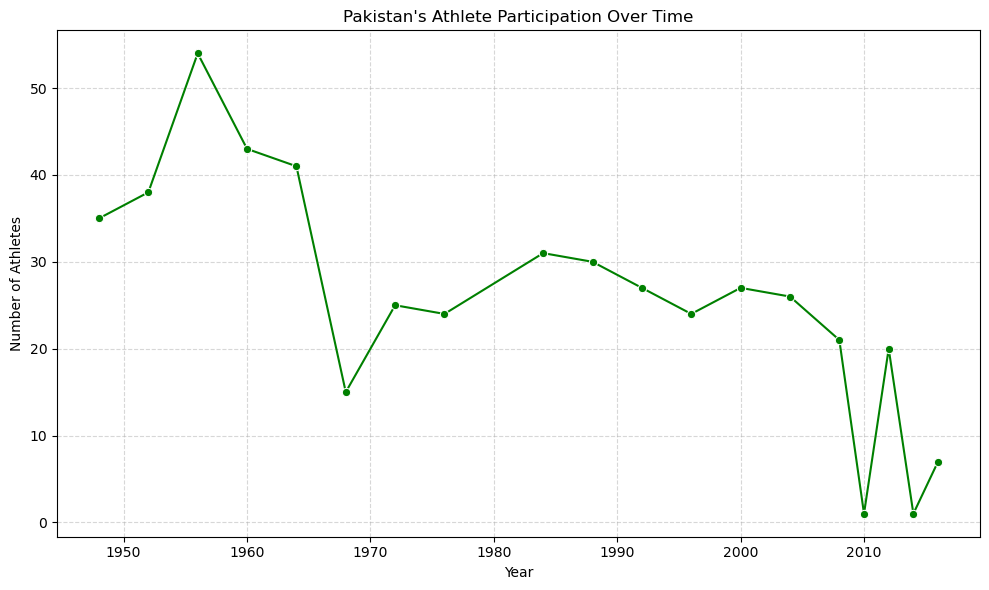

In [72]:
pak_team=df[df['Team']=='Pakistan']
pak_unique=pak_team.drop_duplicates(subset=['Name','Year'])
pak_athlete=pak_unique.groupby('Year')['Name'].size().reset_index(name='athletes')

plt.figure(figsize=(10,6))
sns.lineplot(data=pak_athlete, x='Year', y='athletes',color='green', marker='o')

plt.title("Pakistan's Athlete Participation Over Time")
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()
plt.savefig("Pakistan's Athlete Participation Over Time.png", dpi=300, bbox_inches='tight')


plt.show()

- **This line plot visualizes the number of unique athletes from Pakistan who participated in each edition of the Olympic Games.**
- 📈 **Insights**:
- 📉 The graph shows fluctuations in the number of athletes over different years, reflecting changing levels of participation.

- 🕊️ There are certain years with low or zero participation, which might be due to political, financial, or global events affecting Pakistan's involvement.

- 📈 Some years show significant spikes, which may represent better national focus, qualification in more events, or increased support for athletes.



# Line Plot of the Number of Sports Played in the Olympics Over the Years

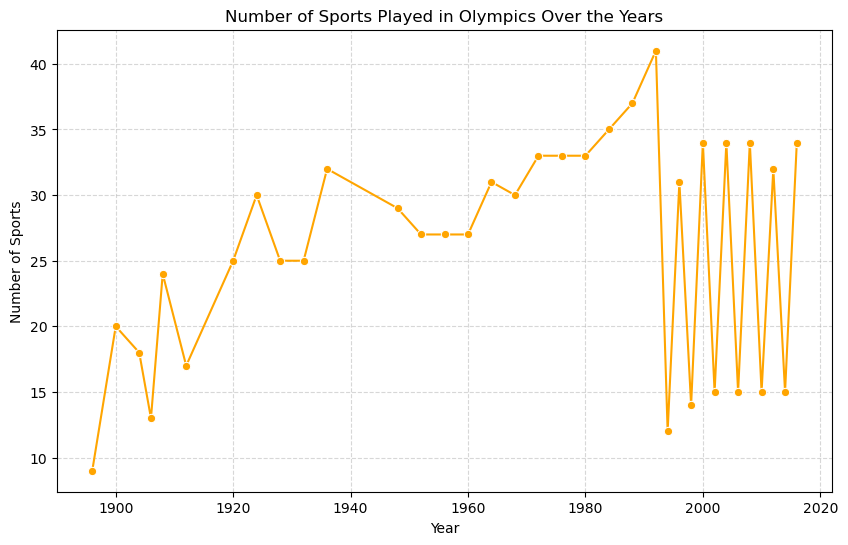

In [71]:
sport=df.drop_duplicates(subset=['Sport','Year'])
group_data=sport.groupby('Year')['Sport'].size().reset_index(name='Sport')


plt.figure(figsize=(10,6))
sns.lineplot(data=group_data, x='Year', y='Sport',marker='o',color='orange')

plt.title('Number of Sports Played in Olympics Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Sports')
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout
plt.savefig("Number of Sports Played in Olympics Over the Years.png", dpi=300, bbox_inches='tight')
plt.show()

- **📈 Insights**:
- 📆 Over the years, the number of sports in the Olympics has generally increased, showing the event's expansion and inclusivity.

- 📉 Some years may show a dip in the number of sports, possibly due to historical events (e.g., World Wars, boycotts).

- ⏱️ The line moves upwards in modern years, indicating greater diversity and inclusion of sports in recent Olympics.

- This visualization provides a clear historical perspective on the diversity of sports in the Olympics and how it has changed across different years.

# Pairplot of Age, Height, and Weight by Gender

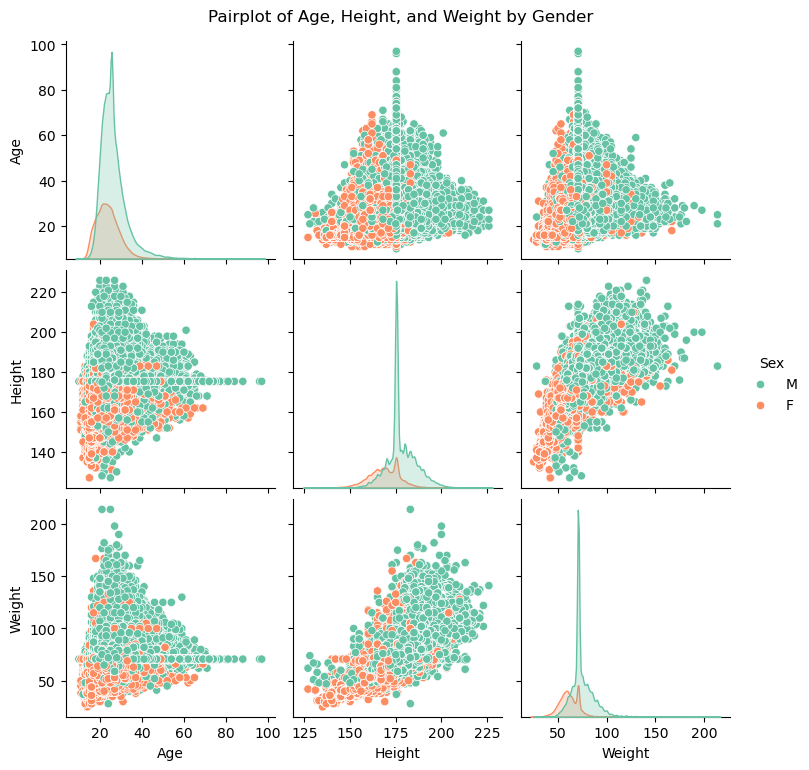

In [23]:
df_pair = df[['Age', 'Height', 'Weight', 'Sex']].dropna()

sns.pairplot(df_pair, hue='Sex', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot of Age, Height, and Weight by Gender', y=1.02)
plt.savefig("pairplot_with_size.png", dpi=300, bbox_inches='tight')

plt.show()

### This pairplot provides a comprehensive comparison of the relationships between Age, Height, and Weight of Olympic athletes, segmented by gender (Sex).

.

- **🔍 Key Details:**
- The data was first cleaned using .dropna() to remove any rows with missing values in the selected columns (Age, Height, Weight, Sex).

- `The Seaborn pairplot was used with:`

- `hue='Sex' to distinguish male and female athletes using different colors.`

- `diag_kind='kde' to show Kernel Density Estimation plots on the diagonal, representing the distribution of each variable.`

- `palette='Set2' for visually distinct and soft colors.`

- The plot was saved using plt.savefig() with high resolution (dpi=300) and bbox_inches='tight' to prevent clipping

- **📈 Insights:**
- The scatter plots show correlations between variables:

- Height vs. Weight has a visible positive correlation in both genders.

- Age shows weaker correlation with the other two variables but still helps understand variation in body metrics across ages.

- Density plots on the diagonal reveal that:

- Female athletes generally have slightly lower height and weight distributions than male athletes.

- Age distribution is somewhat similar between both genders, with a peak around early 20s.

- This pairplot is effective in visualizing multivariate relationships and understanding how basic physical attributes vary by gender among Olympic participants.



# Most Female Participation by Sport

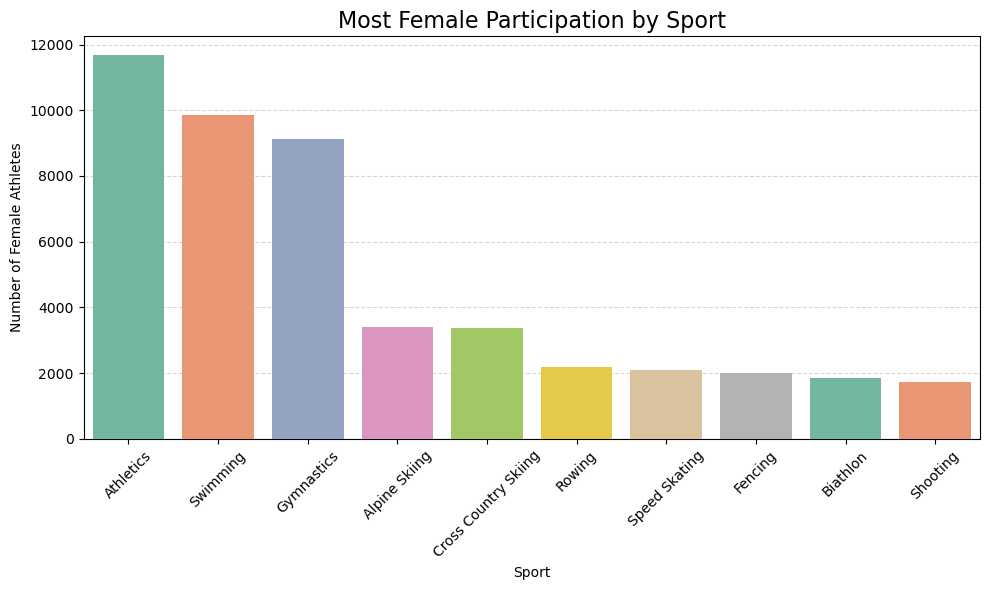

In [69]:
females=df[df['Sex']== 'F']
group_data=females.value_counts('Sport').nlargest(10).reset_index(name='F_count')

plt.figure(figsize=(10,6))
sns.barplot(data=group_data, x='Sport', y='F_count',zorder=3,  hue='Sport', palette='Set2')

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')

plt.title('Most Female Participation by Sport', fontsize=16)
plt.xlabel('Sport')
plt.ylabel('Number of Female Athletes')
plt.tight_layout()
plt.savefig("Most_Female_Participation_by_Sport.png", dpi=300, bbox_inches='tight')
plt.show()

### This bar chart highlights the top 10 Olympic sports with the highest number of female participants across all years in the dataset.
- **🔍 Key Details:**
- The dataset was filtered to include only female athletes using Sex == 'F'.

- The X-axis displays the sport names, and the Y-axis shows the total number of female athletes who have participated in each sport.

- Sports are ranked based on frequency, using nlargest(10) to focus on the top 10.

- The bars are color-coded using the Set2 palette, and a grid along the Y-axis helps visualize the differences in participation.

- **📈 Insights:**
- Sports like Athletics, Swimming, and Gymnastics show significantly higher female participation compared to others.

- This visualization gives us a clear idea of which sports have been more inclusive and popular among female athletes over the years.

- It can also be helpful for gender-based sports analysis, policy-making, or spotting trends in female engagement in specific disciplines.



# Country-wise Female Athlete Participation (Top 20 Countries)

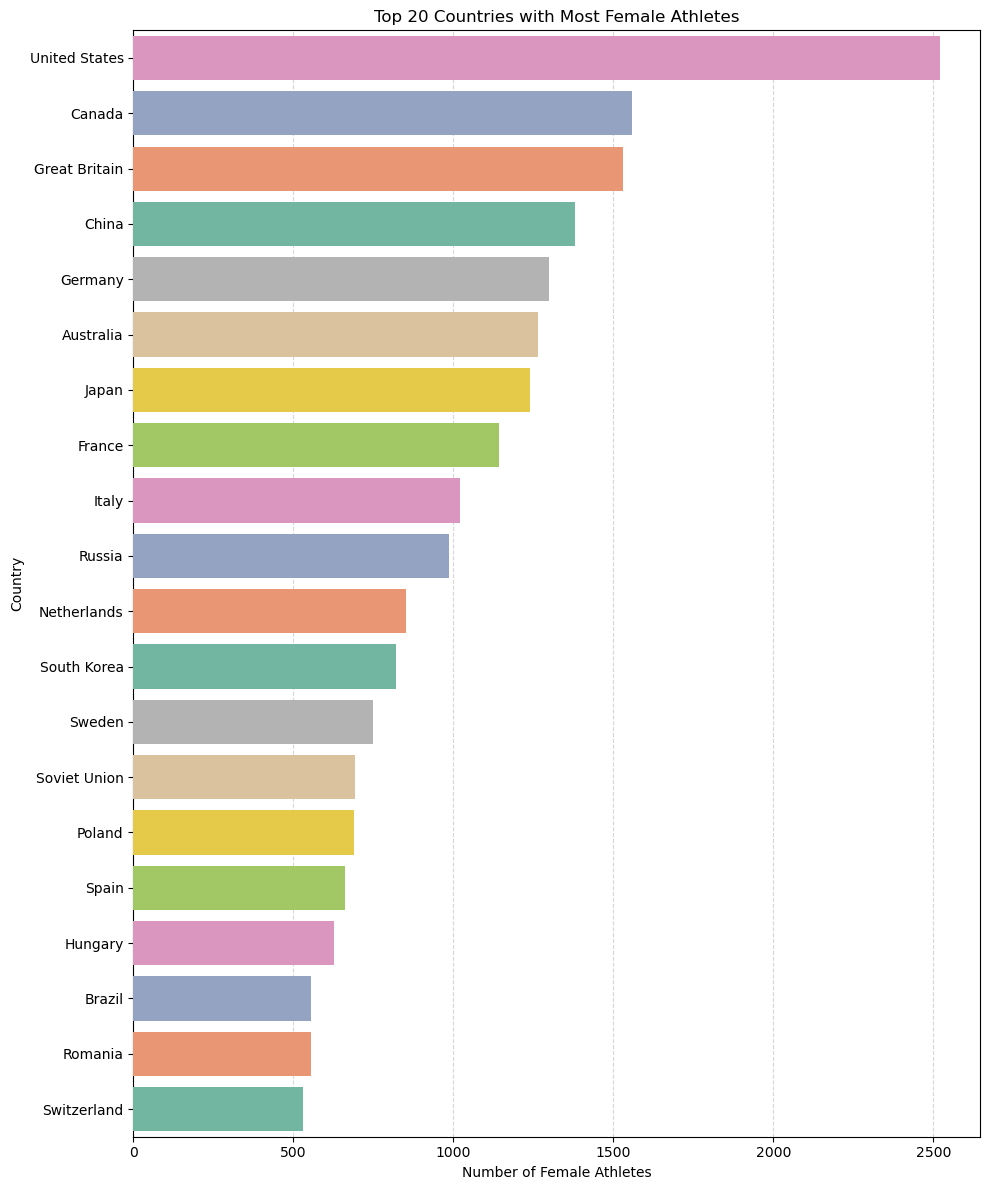

In [70]:
female_data=df[df['Sex']=='F']
group_data=female_data.groupby('Team')['ID'].nunique().sort_values(ascending=False).head(20)


plt.figure(figsize=(10,12))
sns.barplot(y=group_data.index, x=group_data.values,hue=group_data.values ,legend=False,
            palette='Set2',zorder=3)
plt.grid(True, linestyle='--', alpha=0.5, axis='x')


plt.title('Top 20 Countries with Most Female Athletes')
plt.xlabel('Number of Female Athletes')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig("Top_20_Countries_with_Most_Female_Athletes.png", dpi=300, bbox_inches='tight')
plt.show()

### This horizontal bar chart presents a clear comparison of the top 20 countries that have contributed the highest number of unique female athletes to the Olympic Games.

## 🔍 Key Observations:
- `The Y-axis lists the countries (teams), and the X-axis shows the number -  of unique female athletes sent by each country.`

- `The countries are sorted in descending order, meaning the country at the top (e.g., USA) has sent the most female athletes.`

- `The use of color from the Set2 palette improves readability, while the gridlines on the X-axis help in estimating the values easily.`

- `The taller the bar, the greater the number of female participants from that country.`

- **📈 Insights:**
- This chart helps in identifying which nations have been more active in - -promoting female participation in global sporting events like the Olympics.

- It can be used to study gender representation trends and compare female athlete engagement across different countries.